# Creating the dsualm dataset

Before anything, we need to load the pandas, matplotlib, networkx, and nilmtk libraries. We will also make some other adjustments.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

### First Task: Conversion of Files

The first task is to convert the different measurement files in CSV format to HDFS5 format (or simply H5), which we will store in the `./data` folder. Additionally, the H5 file containing the collected data will also include all the metadata from the dataset.

The timestamp provided by the oZM is in a 13-digit format (i.e., it stores up to milliseconds past January 1, 1970). The timestamp in "timezone" for Almeria is "Europe/Madrid" https://www.epochconverter.com/.

The rest of the metadata relate to power (real, reactive, and apparent), voltage, current, frequency, and power factor.

For each CSV file, which we will number from 1 to 11 corresponding to each meter (with number 1 being the main one), in the `convert_ualm` class, we follow these steps:

- Read the numbered file
- Convert the timestamp field to date format
- Load the rest of the columns
- Sort index
- Resample
- Reindex the file

Obviously, the class runs this process for all data files located in the input folder `\electricity\` using the `labels.csv` file.

The content of the `labels.csv` file is as follows:

- 1 mains
- 2 electric furnace
- 3 microwave
- 4 television
- 5 kettle
- 6 vacuum_cleaner
- 7 electric space heater
- 8 electric shower heater
- 9 fan
- 10 fridge
- 11 freezer

Finally, we associate the corresponding metadata by reading files from the path `C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata`.

The files we will use as metadata to incorporate into the H5 file are the following:

- `builiding1.yaml`
- `dataset.yaml`
- `meter_devices.yaml`



In [2]:
from nilmtk.dataset_converters import convert_ualm4
convert_ualm4('./data/ozm1/', 'dsual.h5','2023-06-09','2023-06-09')


Path ualm: ./data/ozm1/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.686296e+12  20.0671 -5.03741  20.689735  49.9827  249.569  0.637181   
1      1.686296e+12  19.1541 -4.62669  19.704964  49.9829  249.532  0.626578   
2      1.686296e+12  19.8674 -4.33612  20.335104  49.9835  249.636  0.638109   
3      1.686296e+12  20.0530 -4.49449  20.550546  49.9838  249.561  0.635802   
4      1.686296e+12  19.4303 -4.29724  19.899855  49.9838  249.598  0.627943   
...             ...      ...      ...        ...      ...      ...       ...   
72505  1.686311e+12  18.5006 -3.01735  18.745054  50.0037  245.483  0.568049   
72506  1.686311e+12  18.6316 -3.21547  18.907005  50.0040  245.404  0.566956   
72507  1.686311e+12  18.6751 -2.88352  18.896381  50.0042  245.437  0.588233   
72508  1.686311e+12  2

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.53099 -0.910622  6.594169  50.0119  250.597  0.762315   
1      1.686296e+12  6.61336 -1.448260  6.770079  50.0123  250.627  0.789422   
2      1.686296e+12  6.69638 -1.274940  6.816666  50.0125  250.641  0.795170   
3      1.686296e+12  6.55177 -0.652868  6.584223  50.0127  250.634  0.784789   
4      1.686296e+12  6.22944 -1.564540  6.422904  50.0131  250.633  0.756067   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  6.47096 -1.452440  6.631958  50.0100  246.319  0.638274   
72510  1.686311e+12  6.15101 -0.485490  6.170145  50.0102  246.384  0.657738   
72511  1.686311e+12  5.78968 -0.595980  5.820273  50.0106  246.386  0.625907   
72512  1.686311e+12  6.26561 -0.499725  6.285507  50.0108  246.392  0.648800   
72513  1.686311e+12  6.35862 -1.307640  6.491686  50.0108  246.445  0.652874   

              A  
0 

File  2  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    3 .csv
..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  5.77502 -1.992620  6.109129  50.0119  250.597  0.729575   
1      1.686296e+12  5.40035 -1.906730  5.727078  50.0123  250.627  0.726315   
2      1.686296e+12  4.88578 -1.943340  5.258085  50.0125  250.641  0.675515   
3      1.686296e+12  5.59766 -1.664340  5.839849  50.0127  250.634  0.731010   
4      1.686296e+12  5.64620 -2.063330  6.011398  50.0131  250.633  0.727209   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  4.77580 -0.477516  4.799614  50.0100  246.319  0.433019   
72510  1.686311e+12  5.23756 -1.869500  5.561213  50.0102  246.384  0.519767   
72511  1.686311e+12  6.

..Reading file csv
          timestamp         W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  1.810370 -1.931660  2.647407  49.9827  249.569  0.308310   
1      1.686296e+12  2.211480 -1.937730  2.940314  49.9829  249.532  0.388199   
2      1.686296e+12  2.426570 -1.430170  2.816669  49.9835  249.636  0.430042   
3      1.686296e+12  2.478110 -2.123570  3.263526  49.9838  249.561  0.430951   
4      1.686296e+12  2.317910 -1.796540  2.932621  49.9838  249.598  0.406717   
...             ...       ...       ...       ...      ...      ...       ...   
72504  1.686311e+12  2.806150 -1.803560  3.335764  50.0037  245.483  0.211528   
72505  1.686311e+12  0.707500 -2.967600  3.050768  50.0040  245.404  0.070961   
72506  1.686311e+12  1.201510 -2.399910  2.683880  50.0042  245.437  0.130688   
72507  1.686311e+12  1.036540 -0.002742  1.036545  50.0042  245.326  0.104733   
72508  1.686311e+12  0.114045 -0.225858  0.253018  50.0044  245.340  0.011259   

        

File  4  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    5 .csv
..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  7.19518 -1.343670  7.319568  50.0119  250.597  0.784734   
1      1.686296e+12  6.33074 -1.954380  6.625548  50.0123  250.627  0.755709   
2      1.686296e+12  7.22518 -1.813550  7.449308  50.0125  250.641  0.820072   
3      1.686296e+12  7.84581 -2.046200  8.108247  50.0127  250.634  0.835204   
4      1.686296e+12  7.13843 -1.333230  7.261860  50.0131  250.633  0.819628   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  6.37104 -0.809024  6.422205  50.0100  246.319  0.641580   
72510  1.686311e+12  6.20218 -1.237330  6.324398  50.0102  246.384  0.630224   
72511  1.686311e+12  6.

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.67992 -0.272088  6.685463  50.0119  250.597  0.812964   
1      1.686296e+12  6.53377 -0.261623  6.539005  50.0123  250.627  0.803584   
2      1.686296e+12  7.24068 -0.075462  7.241070  50.0125  250.641  0.828804   
3      1.686296e+12  6.43571  0.073097  6.436124  50.0127  250.634  0.772016   
4      1.686296e+12  6.33589 -0.340981  6.345061  50.0131  250.633  0.778254   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  5.95188  0.899380  6.019446  50.0100  246.319  0.507164   
72510  1.686311e+12  4.80485 -0.994213  4.906635  50.0102  246.384  0.498785   
72511  1.686311e+12  6.09211 -1.218720  6.212817  50.0106  246.386  0.563504   
72512  1.686311e+12  6.26059 -0.788682  6.310074  50.0108  246.392  0.569725   
72513  1.686311e+12  5.58531  0.008147  5.585314  50.0108  246.445  0.518580   

              A  
0 

File  6  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    7 .csv
..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.71543 -4.35665  8.004840  49.9827  249.569  0.724934   
1      1.686296e+12  6.50393 -4.55253  7.938929  49.9829  249.532  0.712874   
2      1.686296e+12  7.77450 -4.27433  8.872020  49.9835  249.636  0.777963   
3      1.686296e+12  7.07604 -3.83905  8.050382  49.9838  249.561  0.740477   
4      1.686296e+12  7.82655 -4.45481  9.005569  49.9838  249.598  0.767695   
...             ...      ...      ...       ...      ...      ...       ...   
72503  1.686311e+12  5.89296 -4.33892  7.318002  50.0037  245.483  0.537552   
72504  1.686311e+12  6.98046 -3.59093  7.849944  50.0040  245.404  0.655799   
72505  1.686311e+12  5.99012 -3.

File  7  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    8 .csv
..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.44410 -0.915949  6.508865  50.0313  249.229  0.811281   
1      1.686296e+12  6.79106 -1.427430  6.939457  50.0317  249.129  0.794818   
2      1.686296e+12  6.63562 -1.216540  6.746212  50.0321  249.174  0.806646   
3      1.686296e+12  6.59656 -1.255270  6.714931  50.0323  249.148  0.803517   
4      1.686296e+12  6.08645 -1.530570  6.275950  50.0321  249.142  0.795434   
...             ...      ...       ...       ...      ...      ...       ...   
72438  1.686311e+12  7.37083 -0.947882  7.431527  50.0325  244.897  0.835909   
72439  1.686311e+12  7.17695 -0.434184  7.190070  50.0327  244.961  0.827893   
72440  1.686311e+12  6.

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  5.97747 -2.13649  6.347807  50.0313  249.229  0.750696   
1      1.686296e+12  5.87575 -2.08156  6.233561  50.0317  249.129  0.767234   
2      1.686296e+12  5.77264 -2.28011  6.206629  50.0321  249.174  0.763783   
3      1.686296e+12  5.99199 -2.91514  6.663483  50.0323  249.148  0.746382   
4      1.686296e+12  5.63718 -2.37663  6.117691  50.0321  249.142  0.730437   
...             ...      ...      ...       ...      ...      ...       ...   
72438  1.686311e+12  4.61404 -1.81052  4.956546  50.0325  244.897  0.638531   
72439  1.686311e+12  5.31245 -2.08123  5.705583  50.0327  244.961  0.726692   
72440  1.686311e+12  4.32692 -1.01537  4.444461  50.0331  244.946  0.660585   
72441  1.686311e+12  4.77456 -1.84282  5.117853  50.0329  244.831  0.709848   
72442  1.686311e+12  4.20991 -1.92645  4.629749  50.0311  245.025  0.667154   

              A  
0      0.03194

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.24930 -1.17909  6.359557  50.0313  249.229  0.810150   
1      1.686296e+12  6.96858 -1.69897  7.172700  50.0317  249.129  0.825303   
2      1.686296e+12  5.90339 -1.79672  6.170755  50.0321  249.174  0.792563   
3      1.686296e+12  5.94013 -1.46081  6.117118  50.0323  249.148  0.803827   
4      1.686296e+12  5.82167 -1.65465  6.052246  50.0321  249.142  0.750281   
...             ...      ...      ...       ...      ...      ...       ...   
72438  1.686311e+12  5.62107 -1.39890  5.792524  50.0325  244.897  0.678503   
72439  1.686311e+12  5.38401 -1.92307  5.717149  50.0327  244.961  0.686006   
72440  1.686311e+12  5.42719 -1.67810  5.680707  50.0331  244.946  0.771816   
72441  1.686311e+12  5.04226 -2.24823  5.520771  50.0329  244.831  0.678008   
72442  1.686311e+12  5.51246 -1.38880  5.684718  50.0311  245.025  0.747271   

              A  
0      0.03095

File  10  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    11 .csv
..Reading file csv
          timestamp         W      VAR         VA        f      VLN        PF  \
0      1.686296e+12  6.949960 -2.11159   7.263663  50.0313  249.229  0.746188   
1      1.686296e+12  8.584910 -2.24197   8.872829  50.0317  249.129  0.502216   
2      1.686296e+12  6.780490 -2.35227   7.176923  50.0321  249.174  0.793956   
3      1.686296e+12  7.578960 -2.02656   7.845224  50.0323  249.148  0.827525   
4      1.686296e+12  7.206470 -2.45989   7.614743  50.0321  249.142  0.812638   
...             ...       ...      ...        ...      ...      ...       ...   
72438  1.686311e+12 -0.371103 -3.79357   3.811676  50.0325  244.897 -0.011559   
72439  1.686311e+12  7.576190 -7.13054  10.404002  50.0327  244.961  0.220895   
72440  1.686

dataset.yaml cargado ok
meter_devices.yaml cargado
CARGANDO buiding.yaml 
Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


After converting the metadata and data to HDFS5, the first task is to import the dataset that is in HDF5 format in the ./data folder. To do this, the dsual.h5 file is loaded, which contains the collected data and metadata of the dataset..

In [4]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

All NILM datasets consist of several groups of electricity meters.

We can group the meters by the following criteria:

- By households in case there are multiple households per main meter
- By the type of appliance they are directly connected to
- By sampling frequency
- Whether the meter is a "site meter" for the entire house
- If it is a sub-meter, at the level of appliances, or even at the circuit level.

In NILMTK, one of the key classes is `MeterGroup`, which stores a list of meters and allows us to select a subset of meters, add energy from all meters, and many other functions.

When we first open a dataset, NILMTK creates several `MeterGroup` objects. There is a class called `nilmtk.global_meter_group`, which contains all currently loaded meters (even from multiple datasets if more than one dataset has been opened).

There is also a `MeterGroup` per building (which lives in the `Building.elec` attribute). We can also nest "MeterGroups" to add split-phase networks, three-phase networks, and dual-supply appliances (240 volts) in datasets from North America and Canada.



At this point, all metadata has been loaded into memory but none of the energy data has been loaded.
Each building has an ‘elec’ attribute which is a ‘MeterGroup’ object and contains the ‘ElecMeter’ meters.

In [5]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  Ele

Note that there may be nested groups of meters: for example for an electric oven and a washing machine/dryer (both are 240 volt appliances and could have two meters per appliance):

In [6]:
elec.nested_metergroups()

[]

Putting these meters in a meter group allows us to easily add up the energy demand recorded by both meters to get the total energy demand for the whole appliance (but it is also very easy to see the energy demand of the individual meter).

We can easily obtain a MeterGroup from the sub-meters or from the network.

In [7]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

We can easily obtain the sum of the power data from both net meters:

In [8]:
elec.mains().power_series_all_data().head()

2023-06-09 09:34:38+02:00    19.714380
2023-06-09 09:34:39+02:00    19.383181
2023-06-09 09:34:40+02:00    19.311960
2023-06-09 09:34:41+02:00    19.442440
2023-06-09 09:34:42+02:00    19.598539
Name: (power, active), dtype: float32

We obtain the sub-meters associated with the main meter.

In [9]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fri

### Etiquetas de dispositivos

In [10]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadata

Using the print_dict method we can explore the metadata associated with the Dataset.

In [11]:
print_dict(dsualm.metadata)  #metadatos del dataset

We can also explore the metadata associated with the building by

In [12]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Let's take a look at the metadata associated with the synthesised measuring devices.

In [13]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 8 o elec[8]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 9 o elec[9]


print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 10 o elec[10]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 11 o elec[11]




# Statistics and information for individual meters

The ‘ElecMeter’ class represents a single electricity meter. Each ElecMeter has a list of associated device objects. Each meter can be associated with one or more appliances.ElecMeter has many of the same statistics methods as MeterGroup, such as ‘total_energy’ , ‘available_power_ac_types’ , ‘power_series’, ‘power_series_all_data’. 

We will now explore some more statistics functions (many of which are also available in MeterGroup).

Let's look at the meter associated with the kettle:

In [16]:
boiler_meter = elec['incandescent lamp']

Obtaining the upstream meter

In [17]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Meter class metadata

In [18]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Dominant device: If the metadata specifies that a meter has several connected meters, then one of them can be specified as the ‘dominant’ device, and this device can be retrieved using this method.

In [19]:
boiler_meter.dominant_appliance()

Appliance(type='incandescent lamp', instance=1)

### Total energy

Some statistical methods of MeterGroup remain in ElecMeter:

In [20]:
boiler_meter.total_energy() # kWh

active      0.192639
apparent    0.193040
reactive    0.000014
dtype: float64

We can choose to dump all data on the luminaire meter:

In [21]:
next(boiler_meter.load())

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,250.626404,0.035479,7.352906,50.012501,-1.698206,0.803069,7.147068
2023-06-09 09:34:39+02:00,250.635208,0.033995,7.161586,50.013981,-1.845322,0.811182,6.914348
2023-06-09 09:34:40+02:00,250.833603,0.034302,7.199591,50.015839,-1.588852,0.817404,7.020758
2023-06-09 09:34:41+02:00,250.795395,0.033618,7.151567,50.018219,-1.482652,0.829894,6.995146
2023-06-09 09:34:42+02:00,250.624008,0.034108,7.439300,50.020000,-1.590782,0.850206,7.264920
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,246.561005,0.042129,7.200167,50.006039,-1.467250,0.675882,7.019646
2023-06-09 13:36:16+02:00,246.526596,0.041361,6.790637,50.007542,-1.699694,0.642241,6.555442
2023-06-09 13:36:17+02:00,246.499603,0.045683,7.880527,50.008678,-1.976870,0.673558,7.584816


Or load a generator that will give us the values in chunks. More efficient.

In [22]:
next (boiler_meter.power_series())

2023-06-09 09:34:38+02:00    7.147068
2023-06-09 09:34:39+02:00    6.914348
2023-06-09 09:34:40+02:00    7.020758
2023-06-09 09:34:41+02:00    6.995146
2023-06-09 09:34:42+02:00    7.264920
                               ...   
2023-06-09 13:36:15+02:00    7.019646
2023-06-09 13:36:16+02:00    6.555442
2023-06-09 13:36:17+02:00    7.584816
2023-06-09 13:36:18+02:00    6.626526
2023-06-09 13:36:19+02:00    6.582812
Name: (power, active), Length: 14502, dtype: float32

### Get good cross-sections

If we plot the raw power data, we see that there is a large gap where, supposedly, the metering system was not working. (If we were to zoom in, we would also see many smaller gaps) with light_meter.plot.We can automatically identify the ‘good sections’ (i.e. the sections where each pair of consecutive samples is less than the ‘max_sample_period` specified in the dataset metadata):

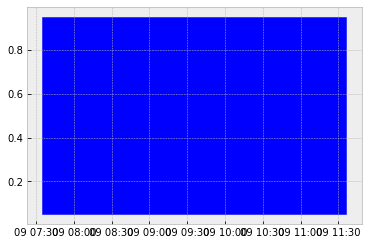

In [23]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

The blue fragments show where the data is good. A white gap would be in incomplete data in the raw power data. Theoretically there could be many smaller gaps that we cannot see at this zoom level.

We can also see the exact sections identified:

In [24]:
good_sections.combined()

[TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)]

## Dropout rate 

In addition to the fact that large gaps may appear due to the whole system being idle, we may also have frequent small gaps due to some sensors dropping data. This is sometimes called ‘dropout’. The dropout rate is a number between 0 and 1 that specifies the proportion of missing samples. A dropout rate of 0 means that no samples are missing. A value of 1 would mean that all samples are missing:

In [25]:
boiler_meter.dropout_rate()

0.0

## Selecting meter subgroups

We use ElecMeter.select_using_appliances () to select a new MeterGroup using a metadata field. For example, to get all the fans in the DSUALM dataset::

In [26]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

Or select several types of devices:

In [27]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

Or all appliances in building 1 with single-phase induction motor (!):

In [28]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK imports the ‘common metadata’ from the NILM metadata project, which includes a wide range of taxonomies of different categories)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype)))

## Measurements available for each meter except for power

In [29]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['voltage', 'power', 'pf', 'current', 'frequency']

In [30]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['voltage', 'power', 'pf', 'current', 'frequency']

In [31]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['voltage', 'power', 'pf', 'current', 'frequency']

In [32]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['voltage', 'power', 'pf', 'current', 'frequency']

In [33]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['voltage', 'power', 'pf', 'current', 'frequency']

In [34]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['voltage', 'power', 'pf', 'current', 'frequency']

In [35]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['voltage', 'power', 'pf', 'current', 'frequency']

In [36]:
elec[7].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['voltage', 'power', 'pf', 'current', 'frequency']

In [37]:
elec[8].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['voltage', 'power', 'pf', 'current', 'frequency']

In [38]:
elec[9].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['voltage', 'power', 'pf', 'current', 'frequency']

In [39]:
elec[10].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['voltage', 'power', 'pf', 'current', 'frequency']

In [40]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['voltage', 'power', 'pf', 'current', 'frequency']

## Power measurements available


In [ ]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [ ]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [ ]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [ ]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [ ]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [ ]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [ ]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [ ]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [ ]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [ ]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [ ]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

From the ‘elec’ attribute you can get information about the meters.

In case of querying for a specific measurement, the following measurement types can be used in both ‘available_physical_quantities’ and ‘available_ac_types’: ‘power’, ‘energy’, ‘cumulative energy’, ‘voltage’, ‘current’, ‘pf’, ‘frequency’, ‘power factor’, ‘state’, ‘phase angle’.

### Sizes available per appliance or appliance

We can look at the measurements from another point of view

Let's see what measurements we have for the fridge, kettle, light, tv, etc:

In [ ]:
fan = elec['fan']
fan.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
kettle = elec['incandescent lamp']
kettle.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
fan = elec['fan']
fan.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
television = elec['television']
television.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
microwave = elec['microwave']
microwave.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
fridge = elec[10]
fridge.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

In [ ]:
freezer = elec[11]
freezer.available_columns()

[('voltage', None),
 ('current', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'reactive'),
 ('pf', None),
 ('power', 'active')]

## Summary of measurements

Now let's take a look at a summary of the measurements available for each meter.

In [ ]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['voltage', 'power', 'pf', 'current', 'frequency']
Mediciones de Potencia disponibles - Dataset: ['active', 'apparent', 'reactive']

Medidas disponibles por cada medidor:
Main: ['voltage', 'power', 'pf', 'current', 'frequency']
Electric furnace: ['voltage', 'power', 'pf', 'current', 'frequency']
Microwave: ['voltage', 'power', 'pf', 'current', 'frequency']
Television: ['voltage', 'power', 'pf', 'current', 'frequency']
Kettle: ['voltage', 'power', 'pf', 'current', 'frequency']
Vacuum cleaner: ['voltage', 'power', 'pf', 'current', 'frequency']
Electric space heater: ['voltage', 'power', 'pf', 'current', 'frequency']
Electric shower heater: ['voltage', 'power', 'pf', 'current', 'frequency']
Fan: ['voltage', 'power', 'pf', 'current', 'frequency']
Fridge: ['voltage', 'power', 'pf', 'current', 'frequency']
Freezer: ['voltage', 'power', 'pf', 'current', 'frequency']

Medidas de potencia por cada medidor:
Main: ['active', 'apparent', 'reactive']
Electric furna

Devices are uniquely identified within a building by a type (lights, television, etc.) and an instance number. If no instance number is specified, ElecMeter retrieves instance 1.

### Network diagram

In [65]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

FileNotFoundError: [Errno 2] No such file or directory: './data/images/2.1_Network.svg'

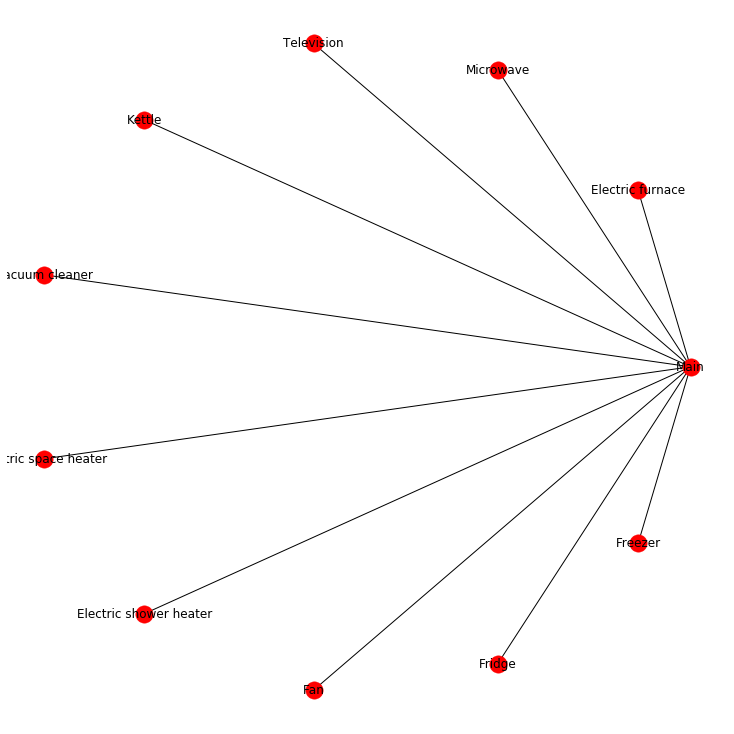

In [66]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTE: The function draw_wiring_graph has problems with Matplotlib 3.3.0 (and therefore with NILMTK) according to issue 868 ( https://github. com/nilmtk/nilmtk/issues/868)), so we need to replace the original function to be able to represent graphically correctly the labels, so we are going to create the new function elec.draw_wiring_graph_2 that we will save in the path \useruserUSUARIO\anaconda3\envs\nilmtk-env\Lib\sitesite-packages\nilmtk\metergroup.py

## Load data into memory

Time intervals at which data are recorded: `elec[1]`.

Timestamp in ‘timezone’ is ‘Europe/Madrid’ https://www.epochconverter.com/

In [67]:
elec.get_timeframe()

TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)

A quick way to load multiple meter data into a DataFrame is to use the `dataframe_of_meters` function and indicate which measurement you want to import from the MeterGroup.

Note that we can only take power data :active', “apparent”, “reactive”.




We are going to show the active power of meters 2 to 6 (i.e. all but the main one). 

In [68]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,6.659478,5.627297,2.294427,7.115504,6.501459,7.061233,6.517518,5.679778,6.069320,7.105977
2023-06-09 09:35:00+02:00,6.707092,5.698653,2.361814,7.069730,6.455584,7.005193,6.463110,38.006298,6.088943,6.935067
2023-06-09 09:36:00+02:00,6.668864,5.694866,2.286583,7.041862,6.466071,6.992028,6.483055,42.328163,6.102707,7.086355
2023-06-09 09:37:00+02:00,6.665710,5.679041,2.312449,7.070269,6.468650,6.984940,6.485741,42.195866,6.094377,7.076911
2023-06-09 09:38:00+02:00,6.542811,5.614527,2.273815,6.990903,6.378938,6.853554,6.398967,41.459007,6.008909,7.012403
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,6.200086,5.260792,36.991589,89.132828,5.787588,5.099467,6.684597,38.864235,5.323210,6.082530
2023-06-09 13:33:00+02:00,6.177860,5.258028,36.880360,89.159805,5.749026,5.168129,6.656781,38.948231,5.304300,6.115490
2023-06-09 13:34:00+02:00,6.191128,5.236365,36.843582,89.147377,5.754669,5.190279,6.675655,38.965096,5.355768,6.124732
2023-06-09 13:35:00+02:00,6.195891,5.308487,30.708815,73.532433,5.789965,5.234657,6.653362,32.654724,5.323315,5.978276


Now let's look at the reactive power of meters 2 to 6 (all but the main one).

In [69]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,-0.952265,-2.036035,-1.746898,-1.688210,-0.086840,-4.206780,-1.238076,-2.092010,-1.376358,-2.247219
2023-06-09 09:35:00+02:00,-0.996361,-2.029599,-1.766816,-1.729704,-0.134160,-4.152298,-1.198263,-1.100987,-1.363500,-2.341162
2023-06-09 09:36:00+02:00,-0.929192,-2.057640,-1.742184,-1.694425,-0.140083,-4.167329,-1.175916,-1.308501,-1.371734,-2.302093
2023-06-09 09:37:00+02:00,-0.983328,-2.000033,-1.756005,-1.714417,-0.112890,-4.148509,-1.211860,-1.585360,-1.392082,-2.241467
2023-06-09 09:38:00+02:00,-0.961886,-2.011293,-1.756204,-1.688043,-0.106796,-4.109009,-1.184674,-1.765816,-1.401023,-2.191934
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,-0.866758,-1.905120,-8.130317,-0.560644,-0.690289,-3.484761,-1.035453,-1.394301,-1.628120,-2.197676
2023-06-09 13:33:00+02:00,-0.835902,-1.884691,-8.277808,-0.567273,-0.621572,-3.503221,-1.007057,-1.718788,-1.645586,-2.395096
2023-06-09 13:34:00+02:00,-0.810407,-1.835981,-8.217063,-0.541413,-0.575628,-3.485582,-1.017359,-1.921618,-1.625728,-2.507585
2023-06-09 13:35:00+02:00,-0.847250,-1.862680,-6.959409,-0.794972,-0.630249,-3.588269,-1.001137,-1.969772,-1.612331,-2.602485


Finally, let's look at the apparent power of meters 2 to 6 (all but the main one).

In [70]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,6.734798,5.996874,2.899392,7.319202,6.513173,8.224914,6.640430,6.059402,6.229357,7.463022
2023-06-09 09:35:00+02:00,6.790720,6.071053,3.007250,7.286892,6.474675,8.152853,6.581085,38.071407,6.247759,7.507247
2023-06-09 09:36:00+02:00,6.741497,6.068726,2.892583,7.249585,6.476480,8.145453,6.595102,42.349602,6.262519,7.463902
2023-06-09 09:37:00+02:00,6.747662,6.039548,2.944080,7.282463,6.482029,8.131053,6.605154,42.226894,6.258857,7.431890
2023-06-09 09:38:00+02:00,6.621015,5.975497,2.891835,7.197885,6.389395,7.996661,6.515429,41.497829,6.177272,7.367433
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,6.277371,5.628080,37.882622,89.135750,5.861484,6.198991,6.774255,38.891197,5.578115,6.928940
2023-06-09 13:33:00+02:00,6.245570,5.599850,37.799618,89.162239,5.794959,6.250995,6.741214,38.987782,5.562084,6.593554
2023-06-09 13:34:00+02:00,6.254384,5.569857,37.750412,89.149658,5.800571,6.260343,6.760714,39.013798,5.608616,6.628055
2023-06-09 13:35:00+02:00,6.267454,5.646599,31.573292,73.583214,5.844032,6.356722,6.737170,32.762802,5.573218,6.730316


The type of data used for each meter can be obtained using the info class

In [71]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2023-06-09 09:34:00+02:00 to 2023-06-09 13:36:00+02:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          243 non-null float32
(Microwave,)                 243 non-null float32
(Television,)                243 non-null float32
(Kettle,)                    243 non-null float32
(Vacuum cleaner,)            243 non-null float32
(Electric space heater,)     243 non-null float32
(Electric shower heater,)    243 non-null float32
(Fan,)                       243 non-null float32
(Fridge,)                    243 non-null float32
(Freezer,)                   243 non-null float32
dtypes: float32(10)
memory usage: 11.4 KB


We can individually assign meter data in a Dataframe.




We see for meter no. 2 (oven) with data captured from 09:40 to 11:44 we have the following table showing all measurements

In [78]:


df_ef = next(elec[2].load()) #DataFrame medidor 
df_ef

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,250.626404,0.033479,6.637608,50.012501,-1.170246,0.777553,6.524388
2023-06-09 09:34:39+02:00,250.635208,0.031936,6.326263,50.013981,-1.104474,0.777606,6.223180
2023-06-09 09:34:40+02:00,250.833603,0.032987,7.058207,50.015839,-1.123151,0.841378,6.963552
2023-06-09 09:34:41+02:00,250.795395,0.032793,6.913026,50.018219,-1.183333,0.826423,6.799436
2023-06-09 09:34:42+02:00,250.624008,0.034406,6.576057,50.020000,-1.065040,0.769048,6.485138
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,246.561005,0.037938,6.031132,50.006039,-1.057026,0.630394,5.902848
2023-06-09 13:36:16+02:00,246.526596,0.038523,6.330210,50.007542,-0.783296,0.660436,6.270394
2023-06-09 13:36:17+02:00,246.499603,0.038472,5.607912,50.008678,-0.330793,0.586485,5.562808


Only the header data can be displayed.

In [73]:
df_ef.head()

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active


We see for meter no. 3 (microwave) with data captured from 09:40 to 11:44 the following table showing all measurements

In [79]:





df_m = next(elec[3].load()) #DataFrame medidor 
df_m

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,250.626404,0.030328,5.789108,50.012501,-1.914072,0.717925,5.461002
2023-06-09 09:34:39+02:00,250.635208,0.030771,5.895151,50.013981,-1.983838,0.718532,5.544482
2023-06-09 09:34:40+02:00,250.833603,0.030475,6.039808,50.015839,-1.994286,0.744744,5.688738
2023-06-09 09:34:41+02:00,250.795395,0.030431,6.009181,50.018219,-2.276928,0.727866,5.551118
2023-06-09 09:34:42+02:00,250.624008,0.040222,6.032832,50.020000,-1.686562,0.661870,5.779770
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,246.561005,0.044714,6.344786,50.006039,-1.426086,0.557617,6.146022
2023-06-09 13:36:16+02:00,246.526596,0.042818,5.658179,50.007542,-2.147300,0.485234,5.141164
2023-06-09 13:36:17+02:00,246.499603,0.047345,7.053833,50.008678,-2.234097,0.562451,6.559786


For meter no. 4 (television) with data captured from 09:40 to 11:44 we have the following table showing all measurements: 

In [80]:

df_ef = next(elec[4].load()) #DataFrame medidor boiler
df_ef

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,249.579208,0.022967,2.920108,49.983341,-1.843934,0.392844,2.248888
2023-06-09 09:34:39+02:00,249.581406,0.022227,2.999817,49.984879,-1.706810,0.440225,2.449710
2023-06-09 09:34:40+02:00,249.780594,0.023024,2.844722,49.986561,-1.720712,0.393261,2.251146
2023-06-09 09:34:41+02:00,249.733200,0.021970,2.931679,49.989159,-1.604822,0.445307,2.443474
2023-06-09 09:34:42+02:00,249.558609,0.022299,2.964682,49.991638,-1.881188,0.406373,2.271430
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,245.527603,0.040111,2.845220,49.999199,-1.877964,0.201156,1.935373
2023-06-09 13:36:16+02:00,245.541595,0.041299,2.793205,50.001122,-1.585931,0.223754,2.208924
2023-06-09 13:36:17+02:00,245.495804,0.031810,2.801896,50.002342,-2.017800,0.241189,1.903220


Let's see for meter no. 5 (teapot) with data captured from 10:16 to 12:58 we have the following table showing all measurements

In [81]:


df_sh = next(elec[5].load()) #DataFrame medidor boiler
df_sh

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,250.626404,0.035479,7.352906,50.012501,-1.698206,0.803069,7.147068
2023-06-09 09:34:39+02:00,250.635208,0.033995,7.161586,50.013981,-1.845322,0.811182,6.914348
2023-06-09 09:34:40+02:00,250.833603,0.034302,7.199591,50.015839,-1.588852,0.817404,7.020758
2023-06-09 09:34:41+02:00,250.795395,0.033618,7.151567,50.018219,-1.482652,0.829894,6.995146
2023-06-09 09:34:42+02:00,250.624008,0.034108,7.439300,50.020000,-1.590782,0.850206,7.264920
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,246.561005,0.042129,7.200167,50.006039,-1.467250,0.675882,7.019646
2023-06-09 13:36:16+02:00,246.526596,0.041361,6.790637,50.007542,-1.699694,0.642241,6.555442
2023-06-09 13:36:17+02:00,246.499603,0.045683,7.880527,50.008678,-1.976870,0.673558,7.584816


Let's see for meter no. 6 (Vacuum cleaner) with data captured from 09:40 to 11:44 we have the following table showing all the measurements

In [75]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vc

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -1.684742  7.619788  248.341995  49.994400   
2023-03-07 11:10:39+01:00 -1.061649  7.134564  248.392807  49.994122   
2023-03-07 11:10:40+01:00 -1.328910  6.991344  248.298996  49.993999   
2023-03-07 11:10:41+01:00 -1.207147  6.560062  248.386002  49.995682   
2023-03-07 11:10:42+01:00 -1.268153  7.110670  248.331604  49.996418   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -1.269902  6.632002  249.955002  49.985119   
2023-03-07 13:12:12+01:00 -1.447212  6.527954  250.007202  49.982960   
2023-03-07 13:12:13+01:00 -1.445601  6.313202  249.822601  49.981480   
2023-03-07 13:12:14+01:00 -1.001184  7.241482  249.993393  49.980640   
2023-03-07 13:12:15+01:00 -1.382175  6.578275  249.927002  49.980202   

physical_quantity                pf   current     power  
type                                           apparent  
2023-03-07 11:10:38+01:00  0.589060  0.062341  7.854456  
2023-03-07 11:10:39+01:00  0.687267  0.041863  7.218447  
2023-03-07 11:10:40+01:00  0.721059  0.039085  7.120562  
2023-03-07 11:10:41+01:00  0.631312  0.046216  6.675759  
2023-03-07 11:10:42+01:00  0.688565  0.041642  7.230792  
...                             ...       ...       ...  
2023-03-07 13:12:11+01:00  0.722085  0.036786  6.754900  
2023-03-07 13:12:12+01:00  0.729416  0.035917  6.697008  
2023-03-07 13:12:13+01:00  0.695515  0.036699  6.502201  
2023-03-07 13:12:14+01:00  0.605597  0.059426  7.344870  
2023-03-07 13:12:15+01:00  0.767026  0.034296  6.724991  

[7298 rows x 7 columns]

Let's see for the last meter nº 7 (oil cooker) with data captured from 09:40 to 11:44 we have the following table showing all the measurements

In [82]:


df_sph = next(elec[7].load()) #DataFrame medidor boiler
df_sph

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,249.579208,0.038570,8.374348,49.983341,-4.295474,0.744789,7.179290
2023-06-09 09:34:39+02:00,249.581406,0.037971,8.227592,49.984879,-4.192926,0.746891,7.078296
2023-06-09 09:34:40+02:00,249.780594,0.037568,7.974191,49.986561,-4.028482,0.733304,6.876500
2023-06-09 09:34:41+02:00,249.733200,0.038409,8.310167,49.989159,-4.281144,0.741673,7.115298
2023-06-09 09:34:42+02:00,249.558609,0.037942,8.212676,49.991638,-4.189970,0.745772,7.060628
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,245.527603,0.039726,6.838224,49.999199,-3.785284,0.580176,5.655998
2023-06-09 13:36:16+02:00,245.541595,0.040144,6.912816,50.001122,-3.827772,0.582537,5.737478
2023-06-09 13:36:17+02:00,245.495804,0.037951,7.046347,50.002342,-3.877478,0.631777,5.881816


Let's see for the last meter nº 8 (water heater) with data captured from 09:40 to 11:44 we have the following table showing all measurements

In [84]:

df_shh = next(elec[8].load()) #DataFrame medidor boiler
df_shh

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,249.164398,0.032569,6.637083,50.031898,-1.269152,0.802339,6.510758
2023-06-09 09:34:39+02:00,249.186600,0.032097,6.618244,50.031281,-0.926629,0.818773,6.545870
2023-06-09 09:34:40+02:00,249.212006,0.032296,6.497870,50.029881,-1.455008,0.786268,6.331176
2023-06-09 09:34:41+02:00,249.224594,0.032444,6.653987,50.032902,-1.381086,0.804430,6.505758
2023-06-09 09:34:42+02:00,249.133194,0.032579,6.568933,50.036079,-1.266430,0.794142,6.444402
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,245.199997,0.035154,6.799964,50.028641,-0.900833,0.781342,6.730960
2023-06-09 13:36:16+02:00,245.099609,0.034174,6.925920,50.031040,-1.154944,0.814852,6.825976
2023-06-09 13:36:17+02:00,245.181000,0.034735,6.832063,50.030880,-0.939967,0.791355,6.740532


Let's see for the last meter nº 9 (fan) with data captured from 09:40 to 11:44 we have the following table showing all measurements

In [85]:


df_fan = next(elec[9].load()) #DataFrame medidor boiler
df_fan

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,249.164398,0.031244,6.313834,50.031898,-2.357986,0.751706,5.851006
2023-06-09 09:34:39+02:00,249.186600,0.031651,6.288949,50.031281,-2.031962,0.753813,5.950320
2023-06-09 09:34:40+02:00,249.212006,0.030278,6.084714,50.029881,-1.992984,0.760461,5.738094
2023-06-09 09:34:41+02:00,249.224594,0.029634,5.817997,50.032902,-1.940938,0.741392,5.479184
2023-06-09 09:34:42+02:00,249.133194,0.031718,6.162494,50.036079,-1.882722,0.742595,5.866570
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,245.199997,0.027637,4.869896,50.028641,-1.630502,0.675731,4.582332
2023-06-09 13:36:16+02:00,245.099609,0.026729,4.711136,50.031040,-1.517698,0.678254,4.448674
2023-06-09 13:36:17+02:00,245.181000,0.027212,4.781457,50.030880,-1.798470,0.663358,4.424990


Let's see for the last meter nº 10 (fridge) with data captured from 09:40 to 11:44 we have the following table showing all the measurements

In [87]:
df_fridge = next(elec[10].load()) #DataFrame medidor boiler
df_fridge

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,249.164398,0.031108,6.374475,50.031898,-1.558048,0.796425,6.176614
2023-06-09 09:34:39+02:00,249.186600,0.031185,6.199690,50.031281,-1.439588,0.775525,6.026804
2023-06-09 09:34:40+02:00,249.212006,0.030569,6.162858,50.029881,-1.299563,0.790313,6.016854
2023-06-09 09:34:41+02:00,249.224594,0.032902,6.361240,50.032902,-1.638368,0.760031,6.144658
2023-06-09 09:34:42+02:00,249.133194,0.030407,6.029924,50.036079,-1.286058,0.777230,5.887724
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,245.199997,0.030919,5.657524,50.028641,-1.772774,0.708287,5.366268
2023-06-09 13:36:16+02:00,245.099609,0.030005,5.754196,50.031040,-1.874386,0.739258,5.436732
2023-06-09 13:36:17+02:00,245.181000,0.030680,5.499740,50.030880,-1.821886,0.688204,5.175892


Let's see for the last meter #11 (freezer) with data captured from 09:40 to 11:44 we have the following table showing all measurements

In [88]:

df_freezer = next(elec[11].load())#DataFrame medidor boiler
df_freezer

physical_quantity,voltage,current,power,frequency,power,pf,power
type,,,apparent,,reactive,,active
2023-06-09 09:34:38+02:00,249.164398,0.042523,7.754676,50.031898,-2.238456,0.736505,7.420158
2023-06-09 09:34:39+02:00,249.186600,0.040926,7.374563,50.031281,-2.168566,0.736074,7.046468
2023-06-09 09:34:40+02:00,249.212006,0.051018,7.673750,50.029881,-2.031310,0.626378,7.386982
2023-06-09 09:34:41+02:00,249.224594,0.035246,7.494849,50.032902,-2.483032,0.803668,7.063768
2023-06-09 09:34:42+02:00,249.133194,0.040809,7.337428,50.036079,-2.254552,0.726530,6.980738
...,...,...,...,...,...,...,...
2023-06-09 13:36:15+02:00,245.199997,0.126375,7.814669,50.028641,-4.199121,0.171517,5.287048
2023-06-09 13:36:16+02:00,245.099609,0.116344,7.668912,50.031040,-3.483946,0.231747,6.177724
2023-06-09 13:36:17+02:00,245.181000,0.125518,6.085419,50.030880,-1.756570,0.153512,4.875948


### Sub-measured energy ratio

Let us calculate the proportion of sub-metered energy in building 1:

In [89]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9864493457234285

Note that NILMTK has issued a warning that Mains uses a different type of power measurement than all sub-meters, so it is not an entirely accurate comparison. Which begs the question: what kind of power measurements are used for Mains and submeters? Let's find out.

### Loads a single column of power data

Use fan.power_series() which returns a generator of one-dimensional pandas.series objects, each containing power data using the most ‘sensitive’ AC type:

In [90]:
series = next(fan.power_series())
series.head()

2023-06-09 09:34:38+02:00    5.851006
2023-06-09 09:34:39+02:00    5.950320
2023-06-09 09:34:40+02:00    5.738094
2023-06-09 09:34:41+02:00    5.479184
2023-06-09 09:34:42+02:00    5.866570
Name: (power, active), dtype: float32

o, to obtain reactive power:

In [91]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2023-06-09 09:34:38+02:00   -2.357986
2023-06-09 09:34:39+02:00   -2.031962
2023-06-09 09:34:40+02:00   -1.992984
2023-06-09 09:34:41+02:00   -1.940938
2023-06-09 09:34:42+02:00   -1.882722
Name: (power, reactive), dtype: float32

### Specify physical_quantity or type of CA

In [92]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2023-06-09 09:34:38+02:00,-2.357986
2023-06-09 09:34:39+02:00,-2.031962
2023-06-09 09:34:40+02:00,-1.992984
2023-06-09 09:34:41+02:00,-1.940938
2023-06-09 09:34:42+02:00,-1.882722


Para cargar datos de voltaje:

In [93]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2023-06-09 09:34:38+02:00,249.164398
2023-06-09 09:34:39+02:00,249.186600
2023-06-09 09:34:40+02:00,249.212006
2023-06-09 09:34:41+02:00,249.224594
2023-06-09 09:34:42+02:00,249.133194


In [94]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                    
type                       apparent  reactive    active
2023-06-09 09:34:38+02:00  6.313834 -2.357986  5.851006
2023-06-09 09:34:39+02:00  6.288949 -2.031962  5.950320
2023-06-09 09:34:40+02:00  6.084714 -1.992984  5.738094
2023-06-09 09:34:41+02:00  5.817997 -1.940938  5.479184
2023-06-09 09:34:42+02:00  6.162494 -1.882722  5.866570

### Charging by specifying the type of AC

In [95]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2023-06-09 09:34:38+02:00,5.851006
2023-06-09 09:34:39+02:00,5.950320
2023-06-09 09:34:40+02:00,5.738094
2023-06-09 09:34:41+02:00,5.479184
2023-06-09 09:34:42+02:00,5.866570


### Charging by resampling to a specific period

In [96]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2023-06-09 09:34:00+02:00,5.679778
2023-06-09 09:35:00+02:00,38.006298
2023-06-09 09:36:00+02:00,42.328163
2023-06-09 09:37:00+02:00,42.195866
2023-06-09 09:38:00+02:00,41.459007


# Statistics for MeterGroups

Calculate the proportion of sub-metered energy in building 1 

In [97]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9864493457234285

## Active, apparent and reactive power

In [98]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity,voltage,current,power,frequency,power,pf,power
type,NaN,NaN,apparent,NaN,reactive,NaN,active
2023-06-09 09:34:00+02:00,NaN,NaN,83.386627,NaN,-22.056324,NaN,79.430099
2023-06-09 09:35:00+02:00,NaN,NaN,152.691574,NaN,-19.646755,NaN,149.175766
2023-06-09 09:36:00+02:00,NaN,NaN,161.563354,NaN,-19.840813,NaN,158.396301
2023-06-09 09:37:00+02:00,NaN,NaN,162.768036,NaN,-20.494192,NaN,159.561798
2023-06-09 09:38:00+02:00,NaN,NaN,159.708420,NaN,-20.623610,NaN,156.513626
...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,NaN,NaN,402.129547,NaN,-33.633003,NaN,398.041565
2023-06-09 13:33:00+02:00,NaN,NaN,400.951355,NaN,-34.804626,NaN,397.234009
2023-06-09 13:34:00+02:00,NaN,NaN,401.898743,NaN,-35.025654,NaN,398.182465


### Energia Total

In [99]:
elec.mains().total_energy() # returns kWh

active      7.669096
apparent    7.707773
reactive    0.324430
dtype: float64

In [100]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

11/11 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,45.69,319.86,1416.52
Electric furnace,17.88,125.13,554.15
Microwave,2.49,17.46,77.34
Television,0.45,3.17,14.03
Kettle,1.15,8.03,35.58
Vacuum cleaner,4.96,34.75,153.89
Electric space heater,6.03,42.20,186.89
Electric shower heater,8.70,60.92,269.81
Fan,0.59,4.14,18.33
Fridge,0.72,5.07,22.47


### Energy per submeter

Let's examine the energy consumption for each submeter

In [101]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,3.000199,0.418728,0.075974,0.192639,0.833169,1.011827,1.460765,0.09922,0.121667,0.105433
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The column headers are ElecMeter instance numbers.

The `fraction_per_meter` function does the same as `energy_per_submeter` except it returns the fraction of energy per meter

Select meters based on their energy consumption

Let's create a new MeterGroup that only contains ElecMeters that used more than 20 kWh:

In [102]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [103]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Plot the fraction of energy consumption of each appliance

In [104]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

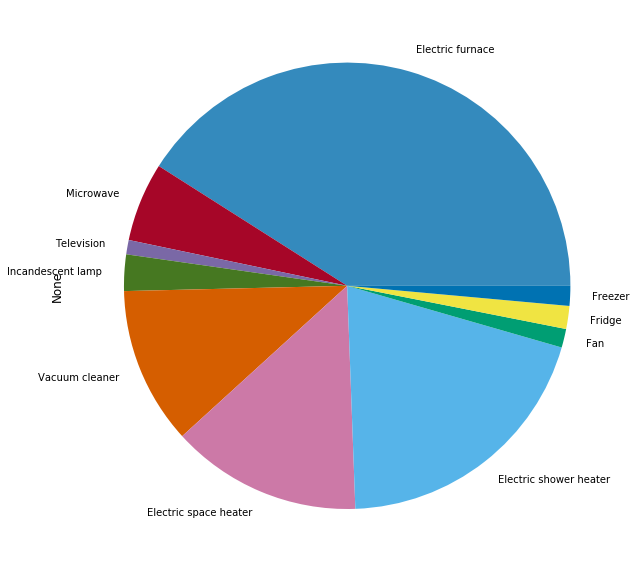

In [105]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Graphics

##Oven

Now we will show the different power, voltage and current measurements

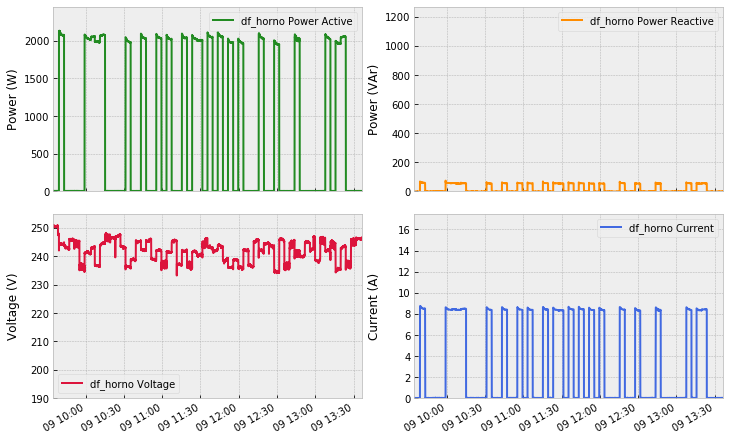

In [107]:



df_ef = next(elec[2].load()) #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_horno Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_horno Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_horno Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_horno Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

### Microwave

Let's now see in graphical form the active and reactive power along with voltage and current for meter number 3 (microwave)

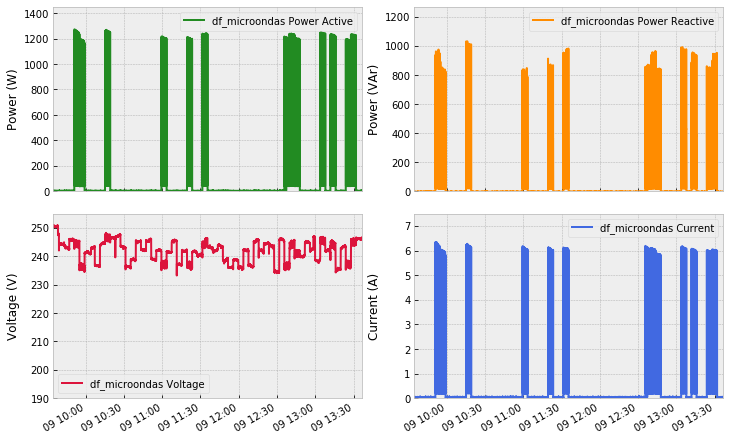

In [108]:


df_mi = next(elec[3].load()) #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microondas Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microondas Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microondas Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microondas Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Let's now see in graphical form the active and reactive power along with voltage and current for meter number 4 (television)

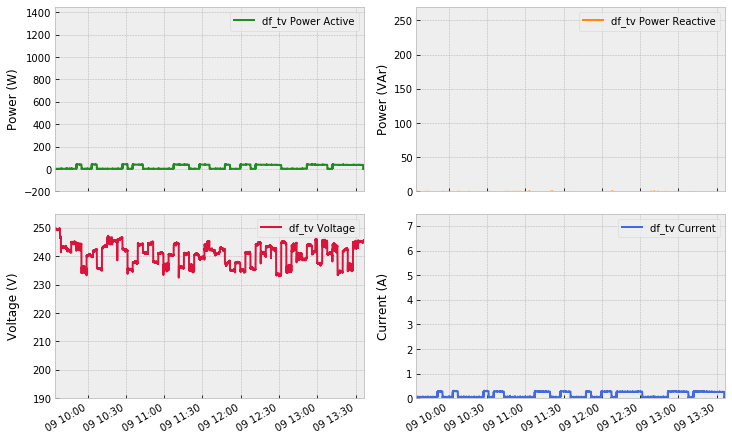

In [109]:



df_tv = next(elec[4].load()) #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

### Kettle

Let's now see in graphical form the active and reactive power along with voltage and current for meter number 7 (Light)

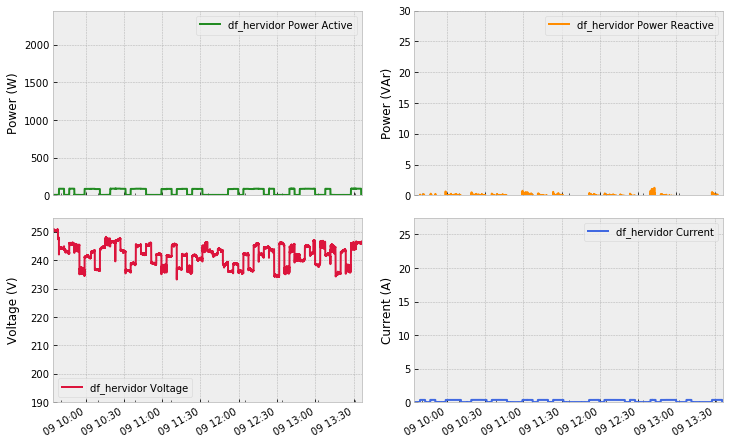

In [110]:



df_ke = next(elec[5].load()) #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_hervidor Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_hervidor Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,30])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_hervidor Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_hervidor Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,27.5])




fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

###  VAC

Let's now see in graphical form the active and reactive power along with voltage and current for meter number 3 

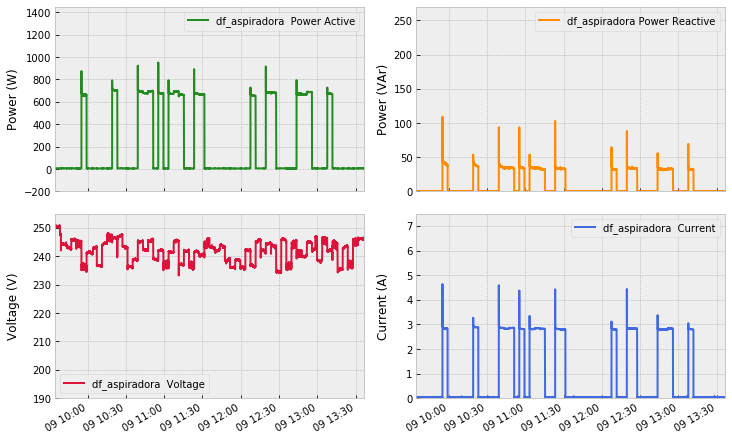

In [111]:




df_vc = next(elec[6].load())#DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_aspiradora  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_aspiradora Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_aspiradora  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_aspiradora  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

### Oil heater

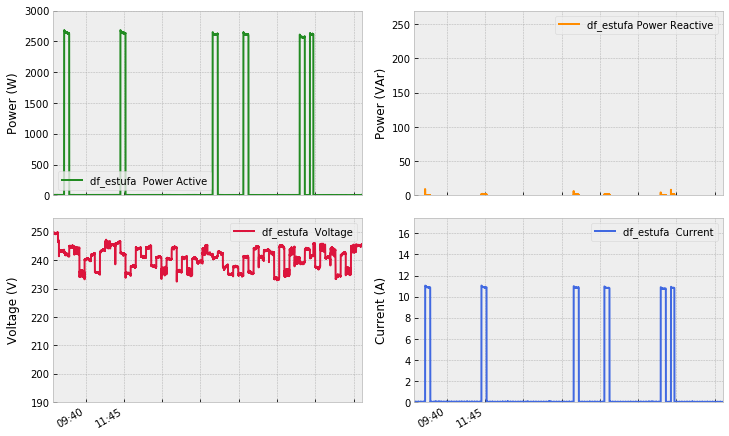

In [112]:




df_sh = next(elec[7].load()) #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_estufa  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,3000])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_estufa Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_estufa  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_estufa  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])


ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Water heater

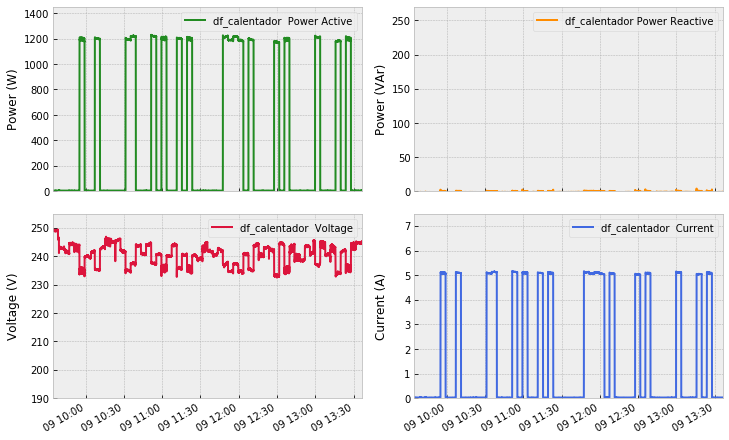

In [114]:



df_sho = next(elec[8].load()) #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_calentador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_calentador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_calentador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_calentador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Fan

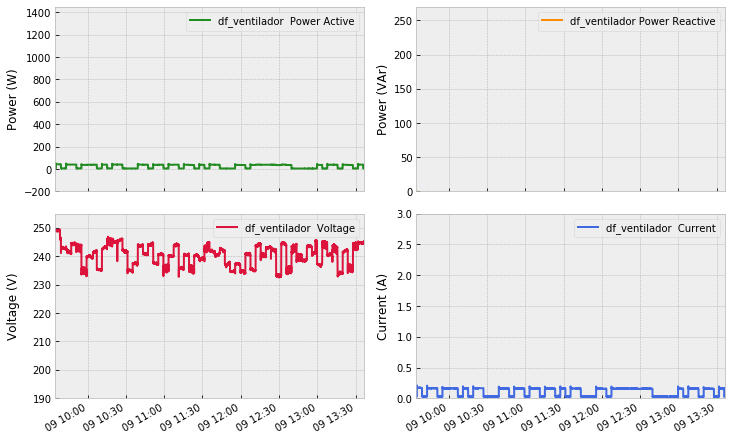

In [115]:




df_fan = next(elec[9].load()) #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_ventilador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_ventilador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_ventilador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_ventilador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,3])




ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Fridge

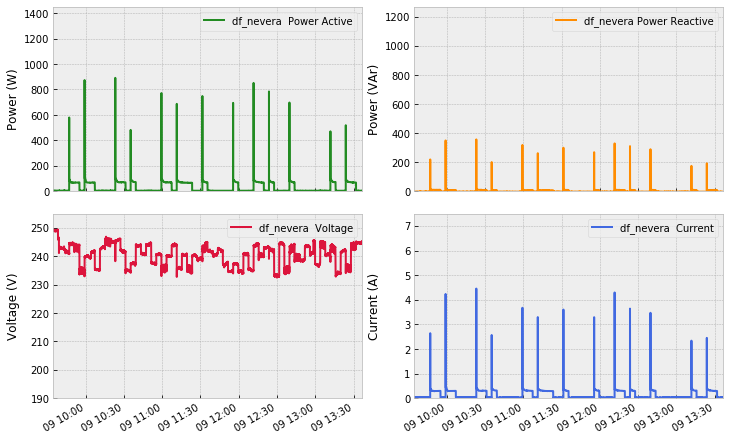

In [116]:



df_fri = next(elec[10].load()) #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_nevera  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_nevera Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_nevera  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_nevera  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_nevera.svg', bbox_inches='tight', transparent=True)
pass

### Freezer

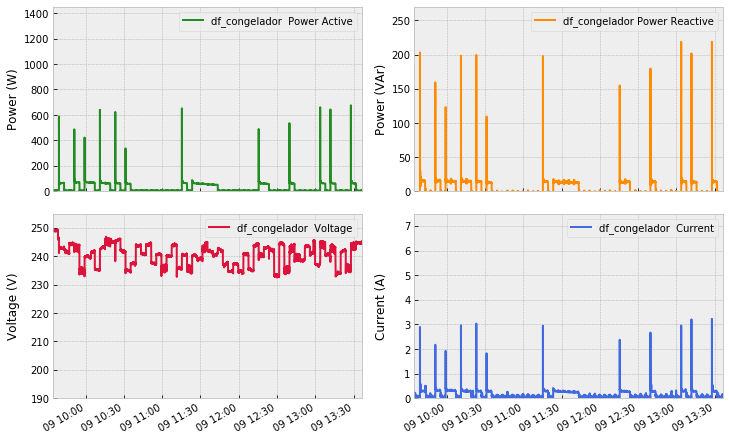

In [117]:



df_fre = next(elec[11].load()) #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_congelador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_congelador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_congelador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_congelador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])




ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### Main

Finally, let's now see in graphical form the active and reactive power along with voltage and current for Main meter 

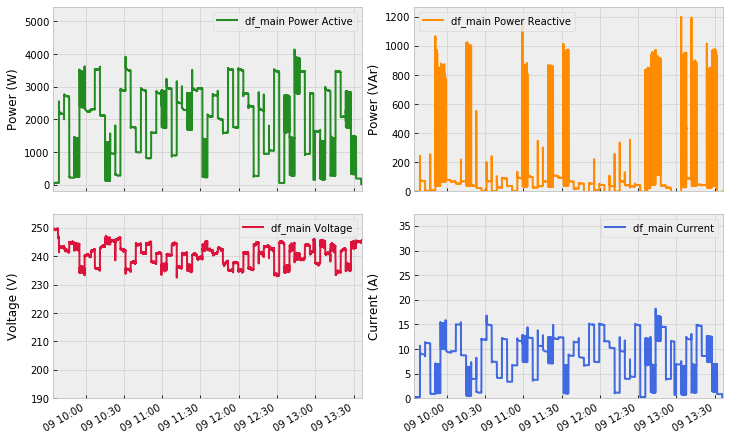

In [118]:



df_main = next(elec[1].load()) #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,5450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,37.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

### Plot appliances when in use

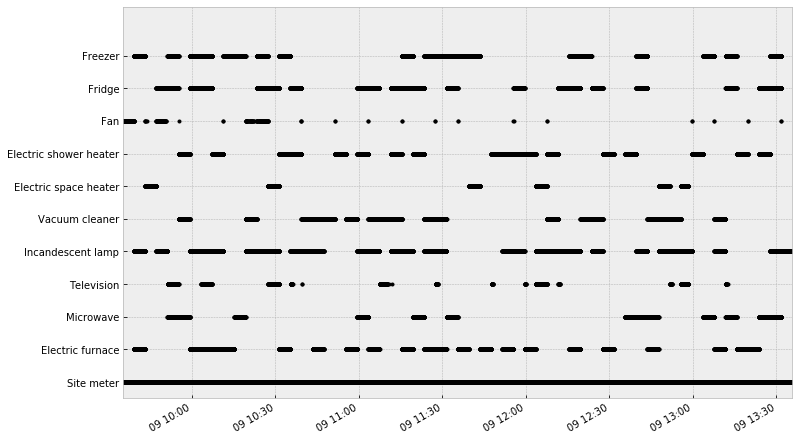

In [119]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Plot sub-metered data for a single day

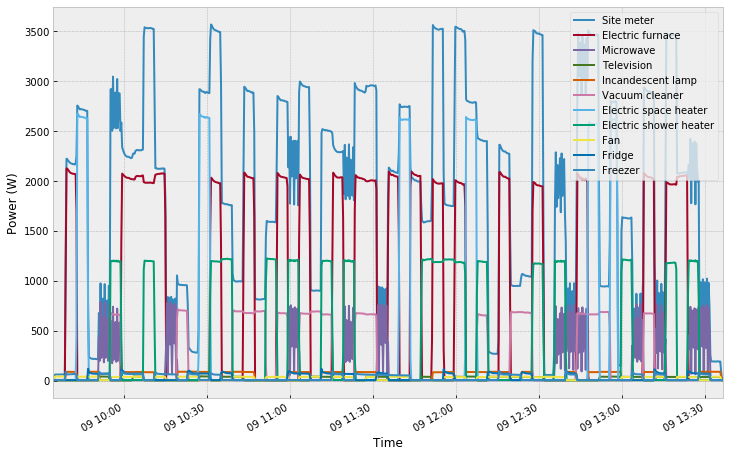

In [120]:
dsualm.set_window(start='2023-06-07', end='2023-06-30')
elec.plot();
plt.xlabel("Time");

## Autocorrelation Plot

In [121]:
from pandas.plotting import autocorrelation_plot

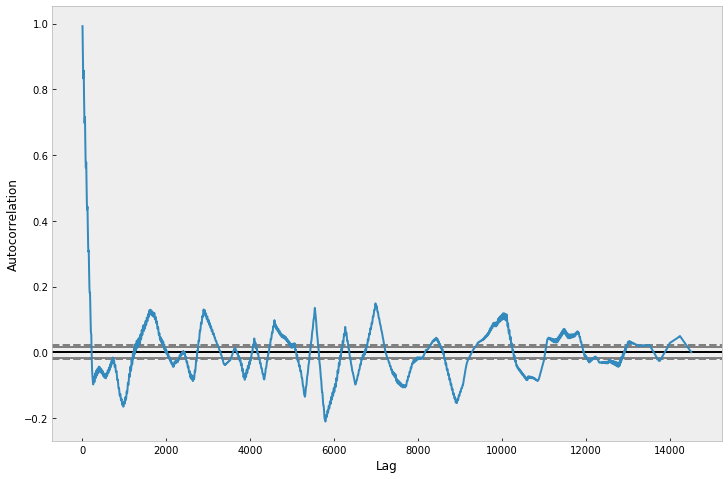

In [122]:
elec.mains().plot_autocorrelation();

## Change in data sampling

When changing data sampling, NILMTK uses by default the mean or arithmetic mean method which will calculate an average of the values found in the time series, divided into groups corresponding to the new sampling period. In addition to this method, others can be specified such as the first valid data point (first), the median (median), the nearest value (nearest), or using the immediately subsequent value (ffill or pad), among others.

### Active Energy

Let's now analyze the active power corresponding to the global meter using different sampling periods

In [125]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

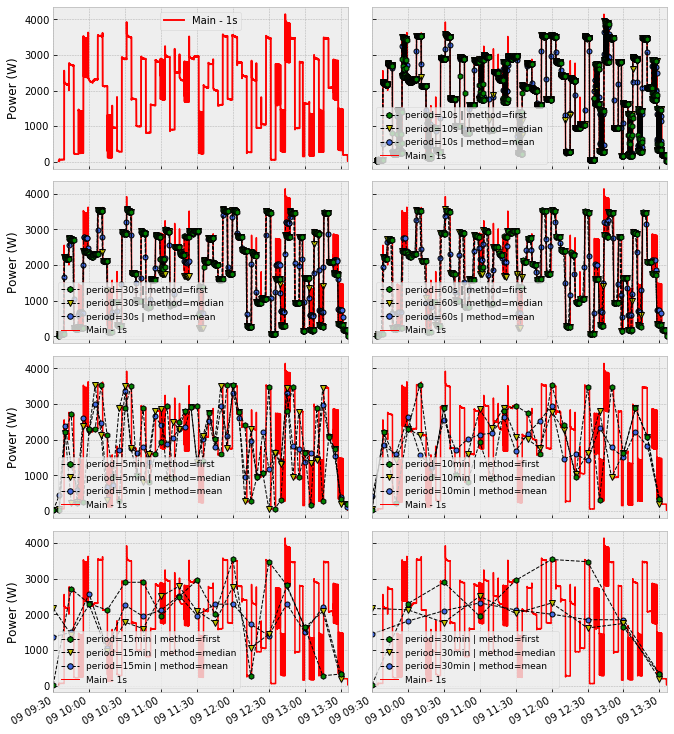

In [127]:
rcParams['figure.figsize'] = (11, 14)



labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s.plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s.plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

#ax1.set(xlim=('2023-03-07 11:10:38+01:00','2022-03-07 13:12:15+01:00'))
ax1.minorticks_off()


#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Reactive Energy

Let's now analyze the reactive power corresponding to the global meter using different sampling periods

In [132]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

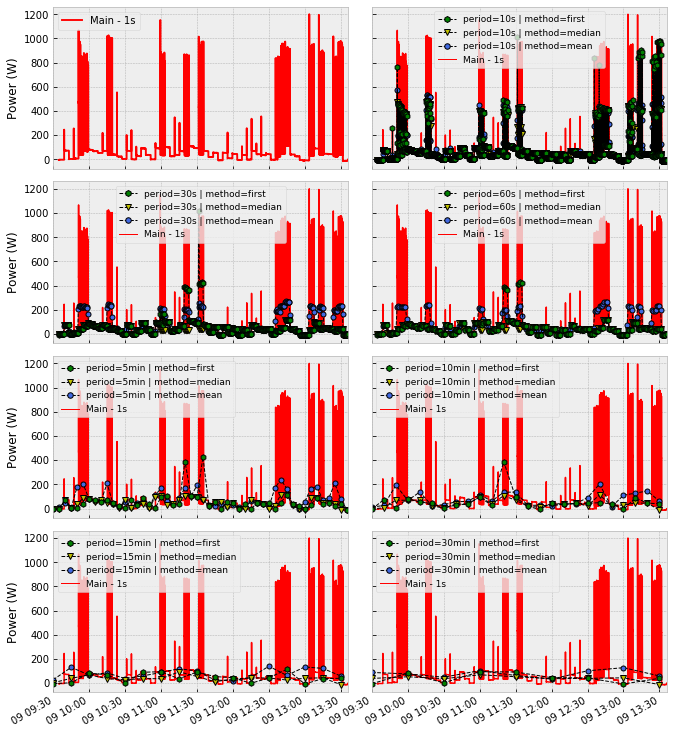

In [133]:
rcParams['figure.figsize'] = (11, 14)



labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s.plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s.plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    


    
ax1.minorticks_off()


#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass